In [33]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import torchmetrics as tm
import torch
import json
import matplotlib.pyplot as plt
import numpy as np

# NN3 Grid search around learning rate - analysis

#### *Should be done with real returns and not winsorized returns*

In [34]:
resultsPath = '../../saved/results/'

In [35]:
NN3Path = resultsPath + 'NN3GridLearningRateTuning/'
predicted_ret_path = NN3Path + 'predicted_returns/'
trial_info_path = NN3Path + 'trial_info/'

In [36]:
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [37]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}

for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    trial_id = file.split('_')[0] 
    # learning_rates.append(learning_rate)   
    learning_rates[trial_id] = learning_rate  


# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
stats = spearman_df.merge(lr_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [38]:
# NN3 Stats (Spearman and LR)
stats

,Id,Spearman_Coefficient,LR
0,16660091510851426,0.066010,0.000200
1,16659974587135558,0.067496,0.000058
2,16659573347656214,0.067707,0.000068
3,16659513093165372,0.067496,0.000058
4,16659745269030252,0.066878,0.000108
5,16659800526498780,0.065517,0.000126
6,16660035606077354,0.062892,0.000171
7,16659856484283236,0.062516,0.000147
8,16659687915781436,0.065737,0.000093
9,16659630756301174,0.067246,0.000079


## Add original point:

In [39]:
# 16647359418773646_trial_full
ETPath = resultsPath + 'ExpandingTuning/'
predicted_ret_path = ETPath + 'predicted_returns/'
trial_info_path = ETPath + 'trial_info/'

predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

for idx, file in enumerate(predicted_ret_files):
    file_split = file.split('_')
    if file_split[0] == '16647359418773646':
        df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
        original_spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret'])).item()


for idx, file in enumerate(trial_info_files):
    if file.split('_')[0] == '16647359418773646':
        with open(trial_info_path + '/' + file, 'r') as f:
            data = json.load(f)
        original_learning_rate = (data['params']['learning_rate'])


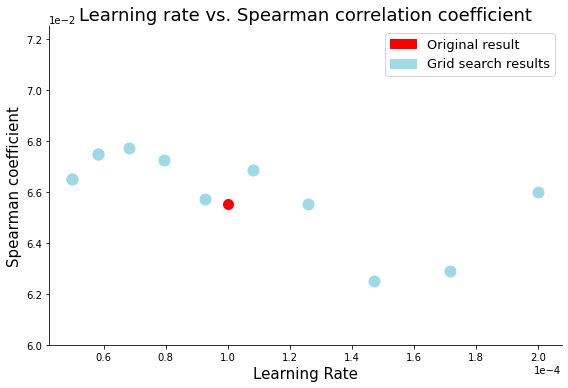

In [41]:
"""# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient')
plt.xlabel('Learning Rate')
plt.ylabel('Spearman coefficient')
plt.plot(original_learning_rate,original_spear,'ro')
plt.grid() #Keep?
plt.tight_layout()"""
# "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'], color=tableau20[19], s=120)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient', fontsize=18)
plt.ylabel('Spearman coefficient',fontsize=15)
# plt.xticks(np.linspace(0, 0.002, 0.01), fontsize=13)
# plt.yticks(np.linspace(0, 0.07, 0.01), fontsize=13)
plt.xlabel("Learning Rate", fontsize=15)
plt.ylim(.06, .0725)
plt.plot(original_learning_rate,original_spear,'ro', ms=10)
# plt.grid(color='gray', linestyle='--', linewidth=.1)
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Original result')
blue_patch = mpatches.Patch(color=tableau20[19], label='Grid search results')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=13)

plt.tight_layout()
plt.show()


# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")


# NN9 Grid search around learning rate - analysis

In [30]:
resultsPath = '../../saved/results/'

NN9Path = resultsPath + 'NN9GridLearningRateTuning/'
predicted_ret_path = NN9Path + 'predicted_returns/'
trial_info_path = NN9Path + 'trial_info/'

In [31]:
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [32]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}

for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    trial_id = file.split('_')[0] 
    # learning_rates.append(learning_rate)   
    learning_rates[trial_id] = learning_rate  


# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
stats = spearman_df.merge(lr_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


KeyboardInterrupt: 

## Original point:

In [ ]:
# 16643916099395694_trial_full
original_trial_id = '16643916099395694'
ETPath = resultsPath + 'ExpandingTuning/'
predicted_ret_path = ETPath + 'predicted_returns/'
trial_info_path = ETPath + 'trial_info/'

predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

for idx, file in enumerate(predicted_ret_files):
    file_split = file.split('_')
    if file_split[0] == original_trial_id:
        df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
        original_spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret'])).item()


for idx, file in enumerate(trial_info_files):
    if file.split('_')[0] == original_trial_id:
        with open(trial_info_path + '/' + file, 'r') as f:
            data = json.load(f)
        original_learning_rate = (data['params']['learning_rate'])

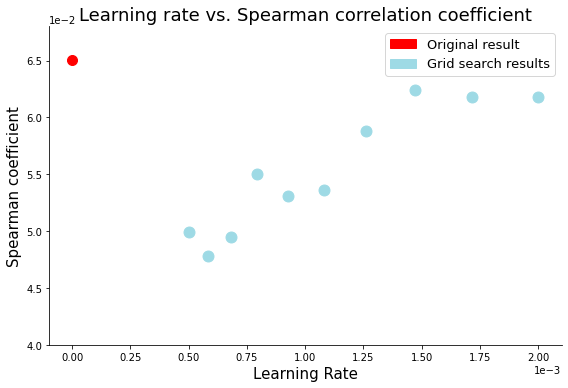

In [ ]:
# "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'], color=tableau20[19], s=120)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient', fontsize=18)
plt.ylabel('Spearman coefficient',fontsize=15)
# plt.xticks(np.linspace(0, 0.002, 0.01), fontsize=13)
# plt.yticks(np.linspace(0, 0.07, 0.01), fontsize=13)
plt.xlabel("Learning Rate", fontsize=15)
plt.ylim(.04, .068)
plt.plot(original_learning_rate,original_spear,'ro', ms=10)
# plt.grid(color='gray', linestyle='--', linewidth=.1)
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Original result')
blue_patch = mpatches.Patch(color=tableau20[19], label='Grid search results')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=13)

plt.tight_layout()
plt.show()


# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")


# Gu et al's grid search around learning rate - analysis

In [ ]:
# Calculate all GridTuning1 spearman coefficients and check which is the best, can we say I used that architecture for the next step?